___
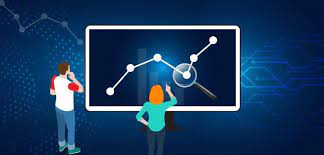


# <font color= #8A0829> Repaso conceptos principales de series de tiempo 2.</font>

<Strong> Objetivos </Strong>
- Revisi√≥n de los modelos cl√°sicos m√°s com√∫nmente utilizados para pron√≥stico de series de tiempo.
- Revisar las propiedas principales que deben de cumplir los modelos lineales para poder ser implementados en modelos de pron√≥stico.
> Referencias: 
    > - https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf/notebook
    > - https://www.projectpro.io/article/how-to-build-arima-model-in-python/544
    > - https://www.statsmodels.org/v0.13.0/examples/notebooks/generated/statespace_sarimax_stata.html
    > - [Lecture 6 part B: Identifying order of ARIMA models](https://www.youtube.com/watch?v=ZE_WGBe0_VU)
    > - https://analyzingalpha.com/interpret-arima-results
___

# Introducci√≥n

El an√°lisis de autocorrelaci√≥n es un paso importante en el an√°lisis exploratorio de datos (EDA) de series temporales. El an√°lisis de autocorrelaci√≥n ayuda a detectar patrones ocultos y estacionalidad y a verificar la aleatoriedad. Es especialmente importante cuando pretende utilizar un **modelo ARIMA** para realizar pron√≥sticos, porque el an√°lisis de autocorrelaci√≥n ayuda a identificar los **par√°metros AR y MA** para el modelo ARIMA.

"Para medir la eficacia de los modelos de *deep learning*, tendremos que compararlos con los modelos tradicionales (lineales)". Por esta raz√≥n esta clase se enfocar√° en realizar una implementaci√≥n de los modelos lineales cl√°sicos y su implementaci√≥n en python.

# Fundamentos

## Auto-Regressive and Moving Average Models

### 1. Auto-Regressive (AR) Model

$$\hat{y}_t = \alpha_0 + \alpha_1 y_{t-1} + \dots + {\alpha_p}y_{t-p} + \epsilon_t$$

donde $|\alpha_i| \leq 1$ para $i=1,\cdots, p$ y Epsilon ($\epsilon_t$) indica el ruido blanco. El modelo AR asume que el valor actual ($y_t$) **depende de los valores anteriores** ($y_{t-1}, y_{t-2}, y_{t-3},...$). Debido a esta suposici√≥n, podemos construir un modelo de regresi√≥n **lineal**.

Para averiguar el orden de un modelo AR, se usar√≠a la gr√°fica de **Partial Autocorrelation Function (PACF)**. Dado que hay p valores pasados, esto se denota como AR(p) o un modelo autorregresivo del orden $p$.

### 2. Moving Average (MA) Model

$$\hat{y}_t = \beta_0 + \beta_1 \epsilon_{t-1} + \dots + \beta_{q} \epsilon_{t-q} + \epsilon_t $$

donde $|\beta_i| \leq 1$ para $i=1,\cdots, q$ y Epsilon ($\epsilon_t$) indica el ruido blanco. El modelo MA asume que el valor actual ($y_t$) **depende de los t√©rminos de error**, inclu√≠do el error actual ($\epsilon_{t}, \epsilon_{t-1}, \epsilon_{t-2}, \epsilon_{t-3},...$). Debido a que los t√©rminos de error son aleatorios, no existe una relaci√≥n **lineal** entre el valor actual y los t√©rminos de error.

Para averiguar el orden de un modelo MA, usar√≠a la gr√°fica de **Autocorrelation Function (ACF)**. Por lo tanto, el modelo anterior se puede denotar de forma independiente como una media m√≥vil de orden $q$ o simplemente MA(q).

**M√©todos para seleccionar los valores de (p, q)**

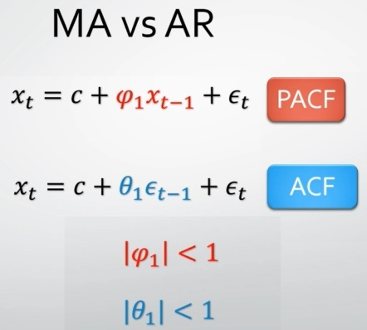

### 3. Auto-Regressive Moving Average (ARMA) Model
No es m√°s que una combinaci√≥n de los modelos AR y MA, es decir, es un modelo que contiene ambos enfoques, el autoagresivo y el de medias m√≥viles. Tambi√©n es usualmente llamado modelo Box-Jenkins
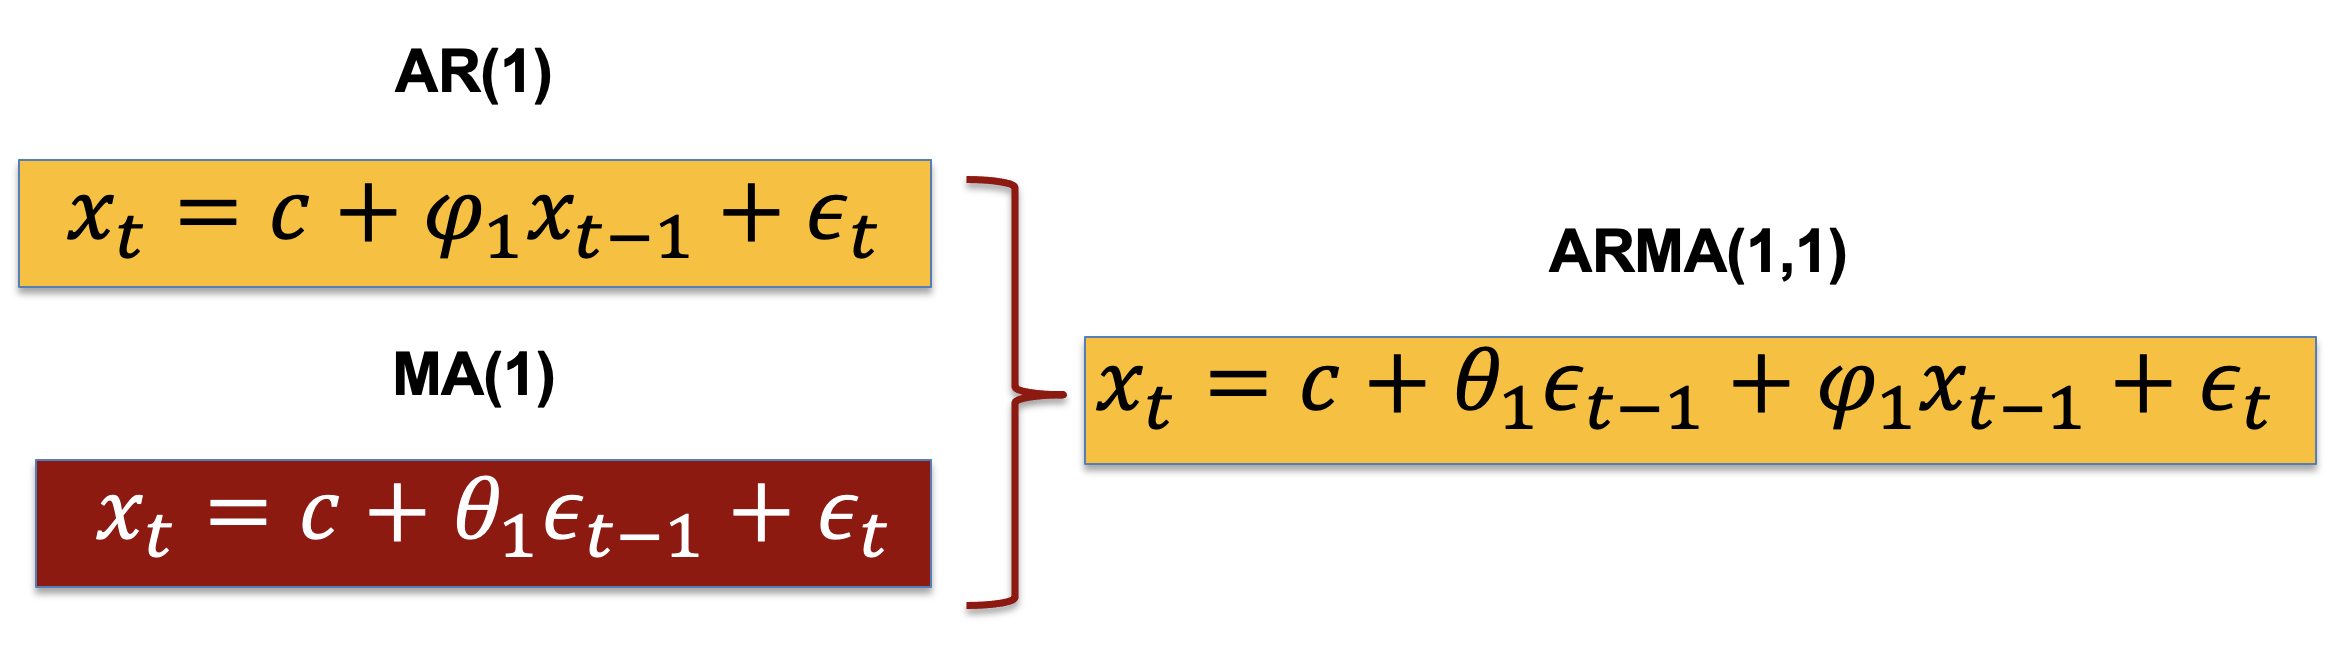

En general un modelo $ARMA(p,q)$ se puede describir con la siguiente ecuaci√≥n general:
$$
\hat{y}_t = c + \sum_{i=1}^p \alpha_i y_{t-i} + \sum_{i=1}^q\beta_i \epsilon_{t-i} + \epsilon_t
$$

Lo que normalmente se hace para elegir este modelo es empezar un modelo de orden alto (sobreparametrizado) e ir reduciendo sus √≥rdenes p y q. Para decidir donde parar de reducir de orden se observa lo siguiente:

|       **Valor**       |       **Significado del valor**      |       **Valor deseado**       |
|:---------------------:|:------------------------------------:|:-----------------------------:|
|     Log Likelihood    |     Logaritmo de la verosimilitud    |     Entre m√°s grande mejor    |
|           AIC         |      Akaike Information Criteria     |      Entre m√°s bajo mejor     |
|           BIC         |     Bayesian Information Criteria    |      Entre m√°s bajo mejor     |

### 4. Auto-Regressive Integrated Moving Average (ARIMA) Model
Los retrasos de la serie estacionaria en la ecuaci√≥n de pron√≥stico se denominan t√©rminos 'autoregresivos', los retrasos de los errores de pron√≥stico se denominan t√©rminos de 'promedio m√≥vil', y una serie de tiempo que necesita diferenciarse para volverse estacionaria se dice que es un t√©rmino 'integrado'. versi√≥n de una serie estacionaria. 

ARIMA utiliza la diferenciaci√≥n para hacer que los datos sean estacionarios. La diferenciaci√≥n, en su forma m√°s simple, implica tomar la diferencia de dos puntos de datos adyacentes. Este cambio puede ser modelado de la siguiente forma:

Definiendo el operador Lag como $L^jy_t = y_{t-j}$ asumiendo una diferencia de orden uno ($d=1$) tenemos:
$$
\begin{aligned}
    \Delta y_t &= y_t - y_{t-1} \\
    & = y_t - L y_t = (1-L)y_t
\end{aligned}
$$
M√∫ltiples iteraciones de diferenciaci√≥n pueden ayudar m√°s hasta cierto punto si es necesario. Diferenciar los datos d veces crea datos diferenciados de orden d. Si $d=2$, tendr√≠amos
$$
\begin{aligned}
    \Delta^2 y_t &= \Delta y_t - \Delta y_{t-1} \\
    & = (y_t-y_{t-1})-(y_{t-1}-y_{t-2})\\
    & = y_t - 2y_{t-1}+y_{t-2} = (1 - 2L + L^2)y_t = (1-L)^2y_t
\end{aligned}
$$
Vemos que se establece aqu√≠ una generalidad. Por lo tanto, una serie diferenciada de orden d se definir√≠a como:
$$
\begin{aligned}
    \Delta^d y_t &= (1-L)^d y_t
\end{aligned}
$$
Finalmente, el modelo ARIMA ser√≠a como sigue
$$
\Delta^d y_t = c + \sum_{i=1}^p \alpha_i \Delta^d y_{t-i} + \sum_{i=1}^q\beta_i \epsilon_{t-i} + \epsilon_t
$$

En lo que respecta a los par√°metros $c$, $\alpha_i$ y $\beta_i$, se actualizan utilizando la estimaci√≥n de m√°xima verosimilitud (MLE), al igual que en la regresi√≥n lineal.

### ¬øC√≥mo elegir los par√°metros del modelo ARIMA?

Existen m√∫ltiples enfoques para establecer los par√°metros ARIMA, ya que se pueden determinar observando las propiedades de los datos o emp√≠ricamente ajustando el modelo y evaluando el rendimiento. Examinaremos m√°s a fondo los gr√°ficos de:
- **Funci√≥n de autocorrelaci√≥n (ACF)**$\longrightarrow$orden del modelo MA(q),
- **Funci√≥n de autocorrelaci√≥n parcial (PACF)**$\longrightarrow$orden del modelo AR(p), 

para identificar la correlaci√≥n general en los datos. Adem√°s, se puede emplear el c√°lculo de la media m√≥vil y la desviaci√≥n est√°ndar o las pruebas existentes, como la prueba **Dickey Fuller** aumentada o ADF, para determinar las propiedades de la serie temporal. 

## Autocorrelaci√≥n
Seg√∫n lo que se ha aprendido hasta ahora, recordemos que en series temporales no podemos cambiar el orden de los datos, porque estos siguen un orden cronol√≥gico, adem√°s, tambi√©n se pueden encontrar relaciones entre valores pasados y valores futuros.

Para entender la autocorrelaci√≥n es importante entender primero la correlaci√≥n. La correlaci√≥n entre dos variables ‚Äòx‚Äô e ‚Äòy‚Äô se denota como:
$$corr(x,y)$$

y esta **da informaci√≥n acerca de c√≥mo 2 series temporales cambian sus valores**. La autocorrelaci√≥n por su parte ser√≠a la correlaci√≥n entre una serie temporal y si misma:
$$corr(x_t,x_{t-k})$$

<span style="color:red">Mide el nivel de semejanza entre una secuencia de varios periodos atr√°s y los datos reales o actuales</span>. El n√∫mero de periodos atr√°s es el valor de k en la expresi√≥n anterior, en pocas palabras, <span style="color:blue">describe la presencia o ausencia de correlaci√≥n en los datos de las series temporales, indicando si las observaciones pasadas influyen en las actuales</span>.

En series temporales es vital poder calcular valores de autocorrelaci√≥n, la cual se puede hacer mediante la funci√≥n de autocorrelaci√≥n y la funci√≥n de autocorrelaci√≥n parcial, ACF y PACF por sus siglas en ingl√©s.

### a). La funci√≥n de autocorrelaci√≥n (ACF)
- Mide la correlaci√≥n entre dos variables separadas por k periodos.
- Mide el grado de asociaci√≥n lineal que existe entre dos variables del mismo proceso estoc√°stico.

La funci√≥n ACF es usada para identificar el proceso de media m√≥vil (MA) en un modelo ARIMA.

Usaremos la funci√≥n `plot_acf` de la biblioteca `statsmodels.graphics.tsaplots`. (Ver [statsmodels.tsa.stattools.acf](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html))

El gr√°fico ACF puede proporcionar respuestas a las siguientes preguntas:
- ¬øLa serie de tiempo observada es **ruido blanco/aleatorio**?
- ¬øEst√° una observaci√≥n relacionada con una observaci√≥n adyacente, una observaci√≥n eliminada dos veces, etc.?
- ¬øSe puede modelar la serie temporal observada con un **modelo MA**? En caso afirmativo, ¬øcu√°l es el orden?

Una gr√°fica de ACF tiene la siguiente forma:
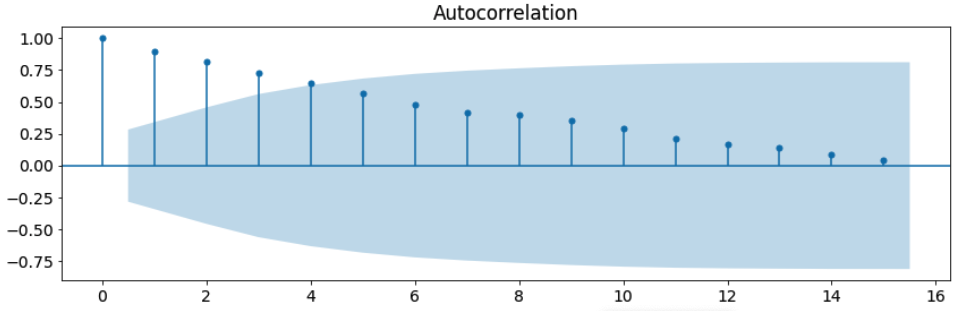

Para esta figura se utilizaron 15 lags, lo cual quiere decir que se analizaron hasta 15 periodos atr√°s de la serie, los valores del eje y, que son la autocorrelaci√≥n, puede tomar valores entre-1 y 1 lo cual indica que puede ver autocorrelaci√≥n positiva o negativa. **El √°rea azul alrededor del eje x representa la significancia de los valores de autocorrelaci√≥n**, lo cual sugiere la existencia de autocorrelaci√≥n para ese retraso espec√≠fico, veamos que el √°rea se hace m√°s grande, ya que a m√°s distancia en el tiempo m√°s improbable es que la correlaci√≥n persista. Si las l√≠neas son m√°s altas que el √°rea azul, se sugiere que existen relaci√≥n entre los datos.

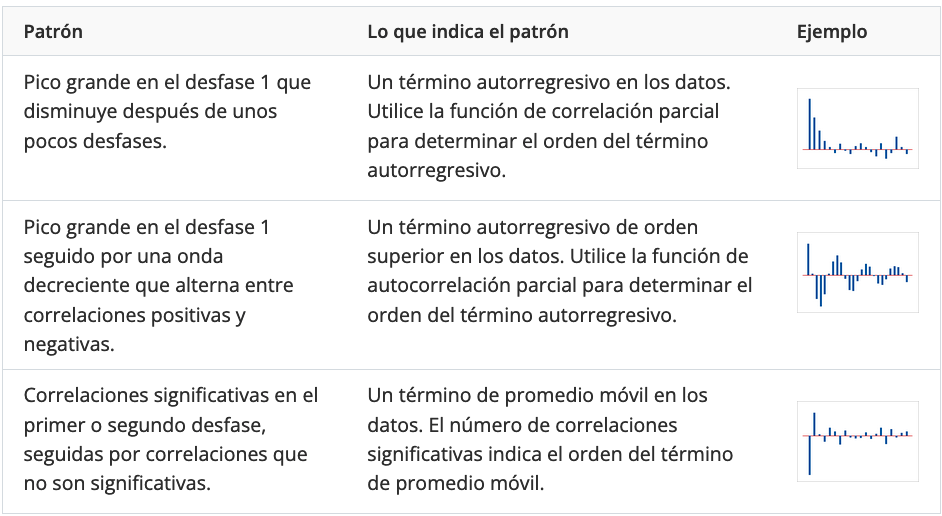

> **ACF**: En t√©rminos simples, describe qu√© tan bien se relaciona el valor presente de la serie con sus valores pasados.

## b). La funci√≥n de autocorrelaci√≥n parcial (PACF)
- Mide la correlaci√≥n entre dos variables separadas por k periodos cuando **no se considera la dependencia creada por los retardos intermedios existentes entre ambas**.
- La autocorrelaci√≥n parcial en el retraso k es la autocorrelaci√≥n entre $X_t$ y $X_{t‚àík}$ que no se explica por los retrasos 1 a $k‚àí1$.
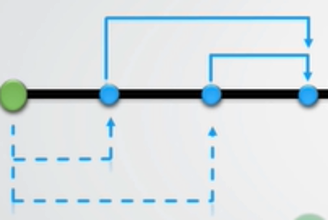

Usaremos la funci√≥n `plot_pacf` de la biblioteca `statsmodels.graphics.tsaplots` con el par√°metro `method = 'ols'` (regresi√≥n de series de tiempo en retrasos y en constante). (Ver [statsmodels.tsa.stattools.pacf](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.pacf.html))

**Nota**: el par√°metro predeterminado para `m√©todo` es `yw` (Yule-Walker con ajuste de tama√±o de muestra en el denominador para acovf). Sin embargo, este valor predeterminado est√° provocando **algunas autocorrelaciones inveros√≠miles superiores a 1** en los datos de muestra. Por lo tanto, cambiamos el par√°metro `method` a uno que no est√© causando este problema. `ywmle` tambi√©n funcionar√≠a bien como se sugiere en esta [publicaci√≥n de StackExchange](https://stats.stackexchange.com/questions/380196/what-do-very-high-pacf-values-10-mean)

El c√°lculo de la correlaci√≥n parcial es m√°s complejo y existen varios m√©todos que lo realizan, entre los cuales est√°n:
- ywunbiased: yule walker con correcci√≥n de sesgo en el denominador.
- ywmle: yule walker sin correcci√≥n de sesgo
- **ols: (ordinary least square) m√≠nimos cuadrados ordinarios.**

El gr√°fico PACF puede proporcionar respuestas a las siguientes preguntas:
- ¬øSe puede modelar la serie temporal observada con un **modelo AR**? En caso afirmativo, ¬øcu√°l es el orden?

Una gr√°fica de PACF tiene la siguiente forma:

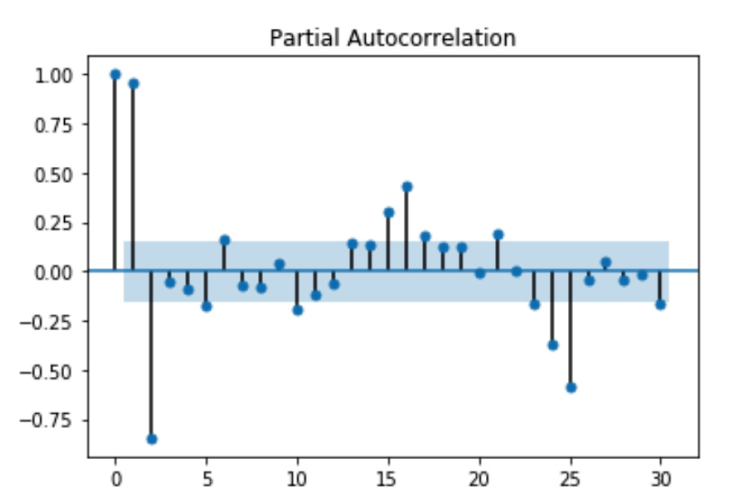

### ACF y PACF asumen la estacionariedad de la serie de tiempo subyacente.

>**Nota**:
>Los datos deben ser estacionarios antes de que usted interprete la gr√°fica de autocorrelaci√≥n. Una serie de tiempo estacionaria tiene una media, una varianza y una funci√≥n de autocorrelaci√≥n que son esencialmente constantes a trav√©s del tiempo

#### Tabla para identificaci√≥n de modelos ARMA

| | AR(ùëù) | MA(ùëû) | ARMA(ùëù, ùëû) | 
|-|-|-|-| 
|ACF|Damped exponential and/or sine functions | Significant at lag ùëû / Cuts off after lag ùëû|Damped exponential and/or sine functions after lag max(0, q ‚àí p)| 
|PACF| Significant at each lag ùëù / Cuts off after lag ùëù|Dominated by damped exponential and/or sine functions |Damped exponential and/or sine functions after lag max(0, p-q)|

### Ejemplos:

Cuales ser√≠an las estructuras adecuadas para los siguientes ejemplos:
#### 1)
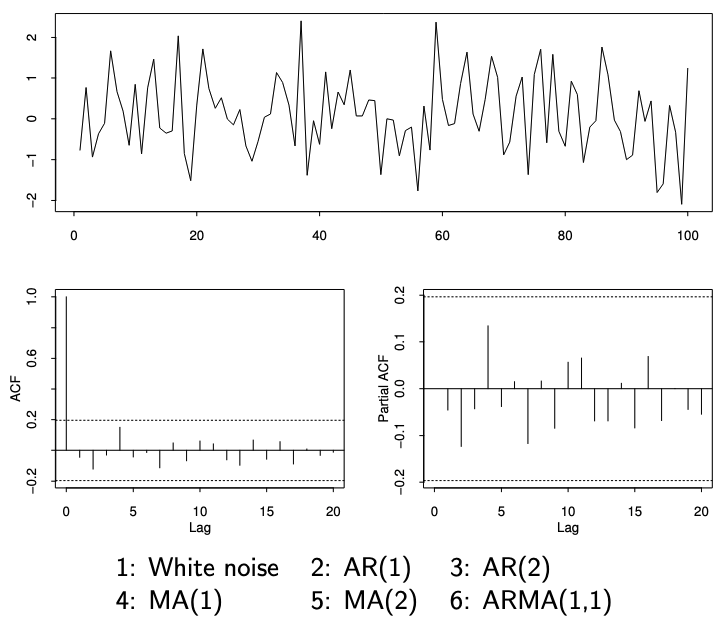

#### 2)
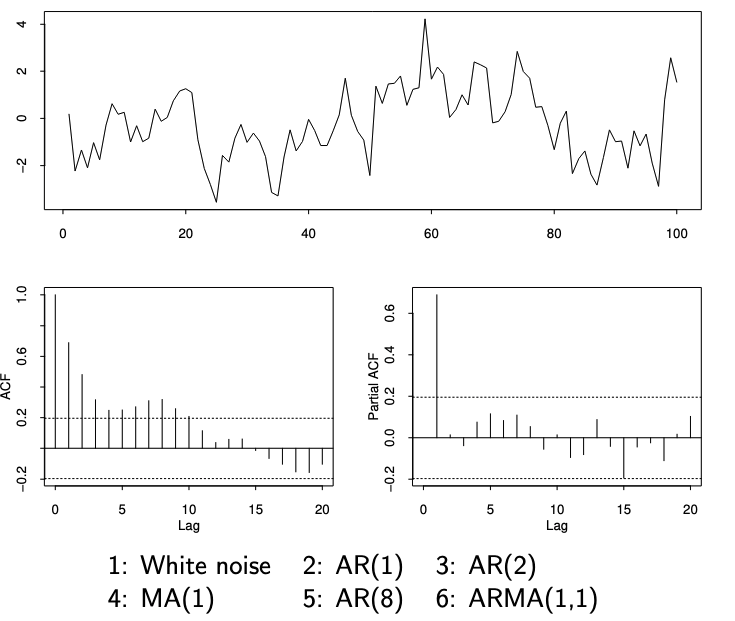

#### 3) 
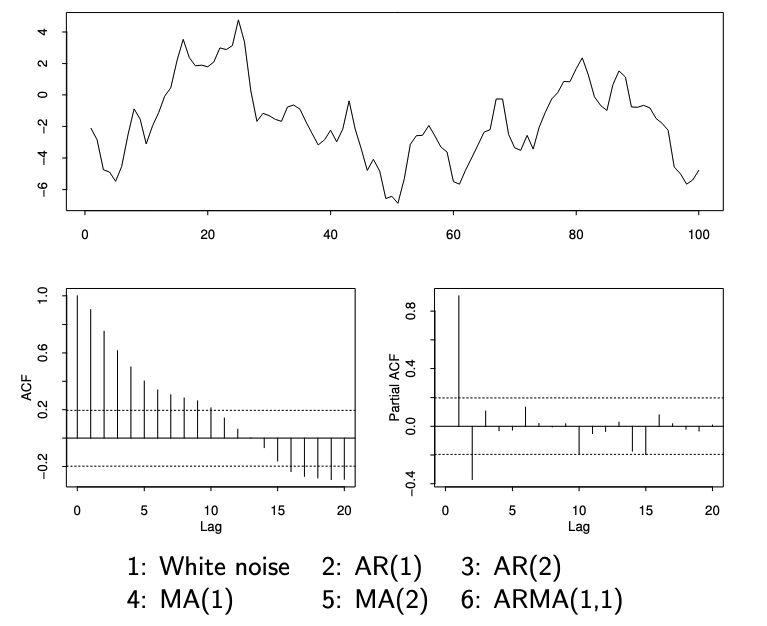

#### 4) 
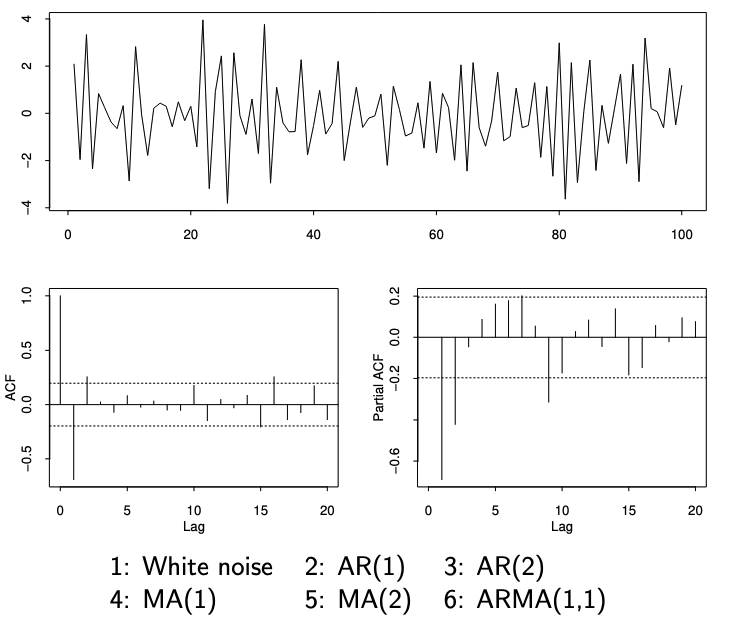

#### 5)
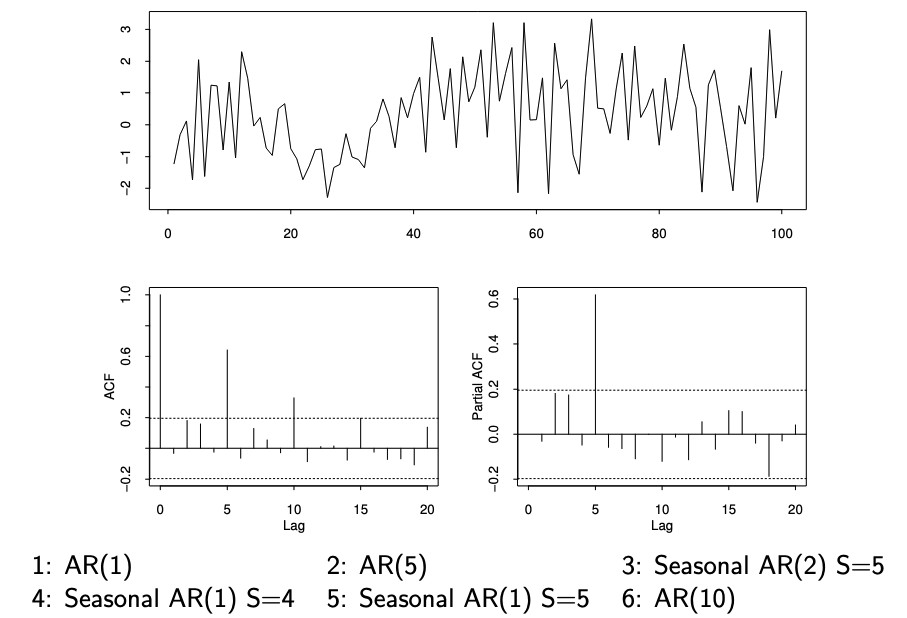

#### 6)-a) 
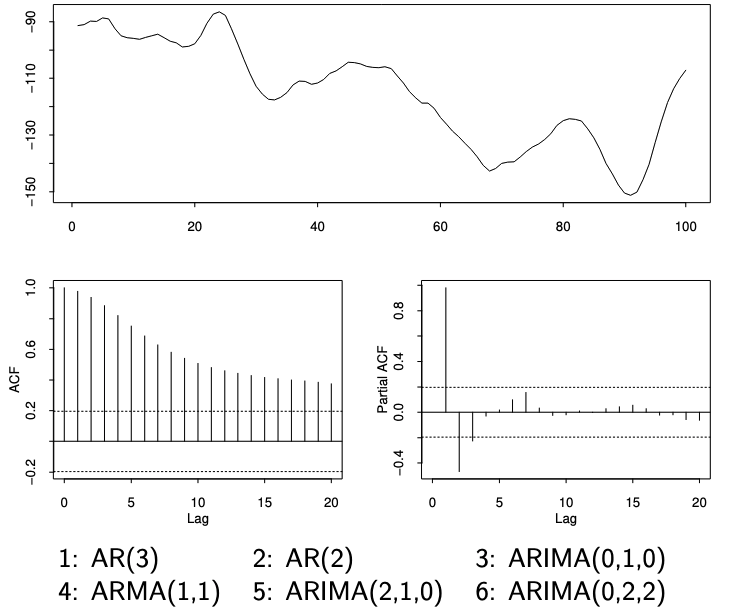

#### 6)-b) Misma serie, pero en esta ocasi√≥n analizando $\Delta y_t= (1-L)y_t= y_t - y_{t-1}$ 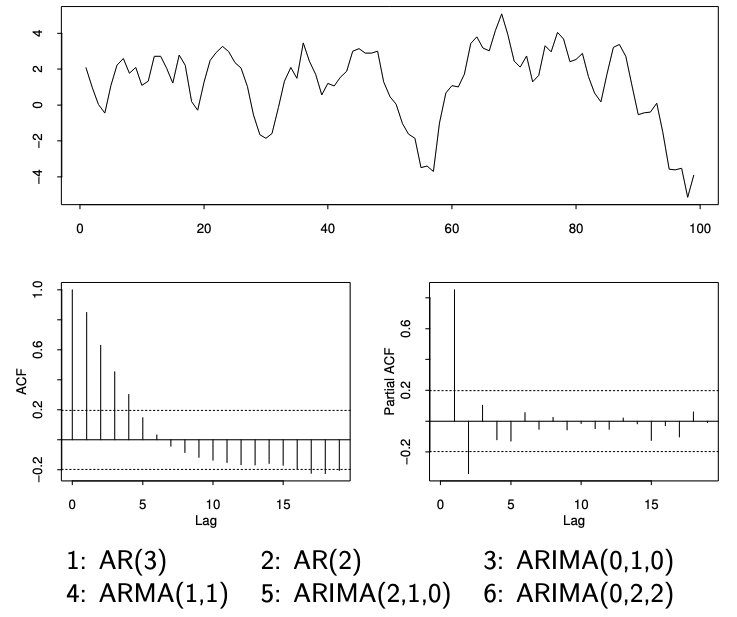

Con esto en mente podemos concluir lo siguiente:
1. Si este m√©todo falla para identificar (p, q) es por que el sistema bajo an√°lisis no es un proceso est√°ndar de AR, MA o ARMA.
2. Se debe intentar alguna otra herramienta o algoritmo.
3. Se puede considerar realizar transformaciones de la serie de tiempo. T√≠picamente se usan sqrt, log, square, inverse, etc.

## Respuestas:
    1). 1.
    2). 2.
    3). 3.
    4). 5.
    5). 5.
    6). 5.

# Implementaci√≥n en python de un modelo ARIMA

Trabajaremos con el conjunto de datos de series temporales WWWUsage para mantener las cosas simples y visualmente intuitivas. WWWUsage.csv contiene 100 minutos de informaci√≥n y cada fila representa la cantidad de usuarios conectados al servidor en ese minuto.

In [3]:
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from io import BytesIO
import pandas as pd

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# plt.rc("figure", figsize=(11,8))
plt.rc("font", size=12)

In [5]:
data = pd.read_csv('datasets/WWWusage.csv', names=[ 'values'], header=0)
data.index = data.index.droplevel()
data

values
1        88
2        84
3        85
4        85
5        84
..      ...
96      222
97      228
98      226
99      222
100     220

[100 rows x 1 columns]

<Axes: >

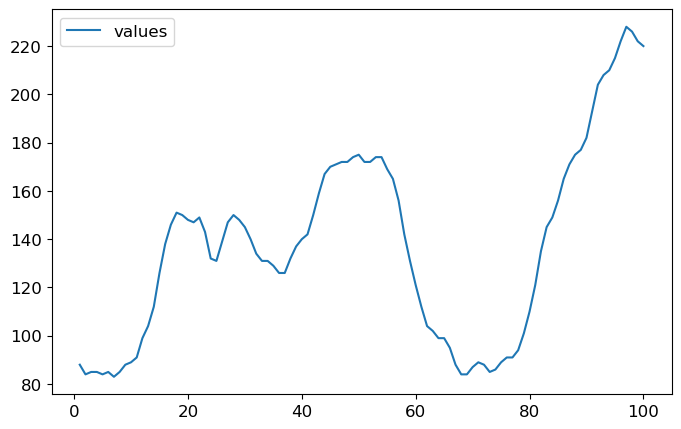

In [6]:
data.plot(figsize=(8,5))

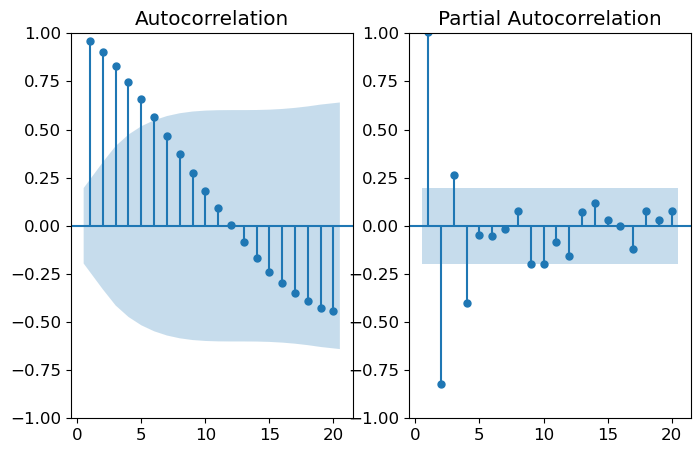

In [8]:
# Escoger par√°metros de ARIMA

# 1. Graficar ACF y PACF
f = plt.figure(figsize=(8,5))

ax1 = f.add_subplot(121)

plot_acf(data, ax=ax1, zero=False, lags=20)

ax2 = f.add_subplot(122)
plot_pacf(data, ax=ax2, zero=False, method='ols')

plt.show()

Con los datos c√≥mo los tenemos podemos confiarnos de los resultados arrojados por ACF y PACF?

Que nos falta hacer...

In [9]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [10]:
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                 -2.464240
p-value                         0.124419
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary


Tratemos de volver estacionario nuestra serie de tiempo (differencing).

In [11]:
# Ilustraci√≥n del m√©todo differencing con pandas
ilustracion = pd.DataFrame()

ilustracion['real'] = data
ilustracion['1d'] = data.diff()
ilustracion['p=2'] = data.diff(periods=2)
ilustracion['2d'] = data.diff().diff()

ilustracion

real   1d   p=2   2d
1      88  NaN   NaN  NaN
2      84 -4.0   NaN  NaN
3      85  1.0  -3.0  5.0
4      85  0.0   1.0 -1.0
5      84 -1.0  -1.0 -1.0
..    ...  ...   ...  ...
96    222  7.0  12.0  2.0
97    228  6.0  13.0 -1.0
98    226 -2.0   4.0 -8.0
99    222 -4.0  -6.0 -2.0
100   220 -2.0  -6.0  2.0

[100 rows x 4 columns]

In [12]:
diff1_values = data.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

diff2_values = data.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)


ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.722238
p-value                         0.070268
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary
ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -9.929762e+00
p-value                        2.843429e-17
#Lags Used                     1.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64
Stationary


Concluir y comentar posibles acciones!

Realizamos nuevamente las gr√°ficas de ACF y PACF para los datos estacionarios elegidos anteriormente para calcular $p$ y $q$.

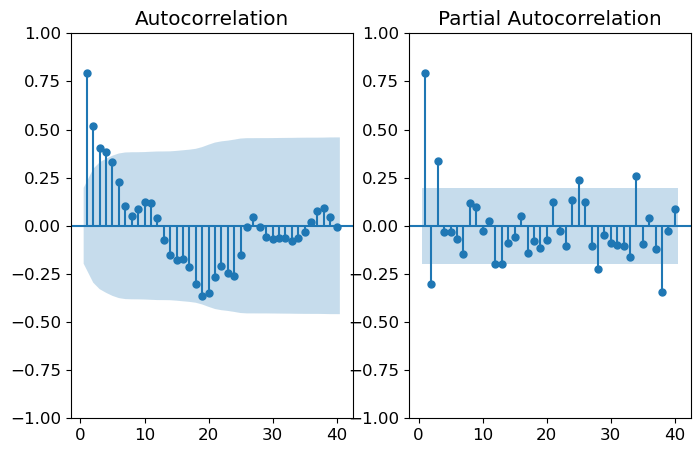

In [13]:
# 1. Graficar ACF y PACF
def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

plot_acf_pacf(diff1_values, {'lags':40})

1. En base a la anterior gr√°fica enuncie los posibles valores de $p$, $d$ y $q$.

### ARIMA(p=3, d=1, q=4) √≥ ARIMA(p=3, d=1, q=0)

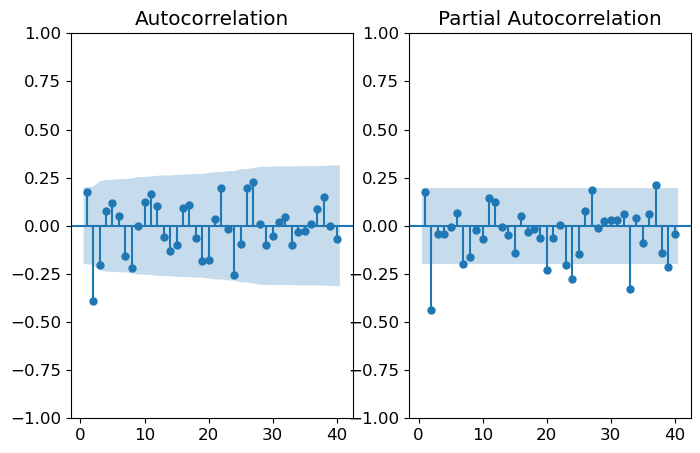

In [14]:
plot_acf_pacf(diff2_values, {'lags':40})

2. En base a la anterior gr√°fica enuncie los posibles valores de $p$, $d$ y $q$.

ARIMA(p=2, d=2, q=2)

**Escribir las ecuaciones finales en el tablero...**

In [15]:
# 1. Modelo de diferencia de primer orden
arima_model1 = ARIMA(data, order=(3, 1, 4))
model1 = arima_model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                  100
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -248.866
Date:                Tue, 04 Feb 2025   AIC                            513.731
Time:                        21:39:47   BIC                            534.492
Sample:                             0   HQIC                           522.131
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6150      0.148     10.902      0.000       1.325       1.905
ar.L2         -1.5354      0.174     -8.814      0.000      -1.877      -1.194
ar.L3          0.6229      0.139      4.471      0.0

In [16]:
# 2. Modelo de diferencia de segundo orden

# Basado en lo discutido anteriormente, necesitamos s√≥lo considerar algunos t√©rminos AR y MA.
# Para ello definimos sus coeficientos c√≥mo la especificaci√≥n de polinomios

# T√©rminos de AR
ar = (0, 1)  # (alpha1, alpha2)
# T√©rminos de MA
ma = (0, 1)  # (beta1, beta2)

arima_model2 = ARIMA(data, order=(ar, 2, ma))
model2 = arima_model2.fit()
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                  100
Model:             ARIMA([2], 2, [2])   Log Likelihood                -256.198
Date:                Tue, 04 Feb 2025   AIC                            518.396
Time:                        21:44:57   BIC                            526.151
Sample:                             0   HQIC                           521.532
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2         -0.2090      0.240     -0.870      0.384      -0.680       0.262
ma.L2         -0.2188      0.238     -0.918      0.359      -0.686       0.248
sigma2        10.8799      1.740      6.253      0.0

<Axes: >

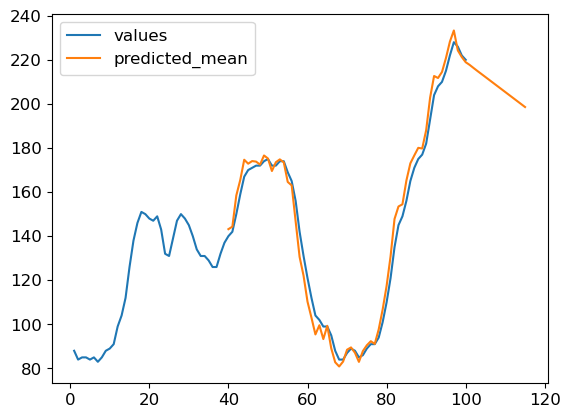

In [17]:
# C√≥mo realizar predicciones con el modelo ajustado
y_h = model2.predict(start=40, end=115, dynamic=False).to_frame()

ax = data.plot()

y_h.plot(ax=ax)

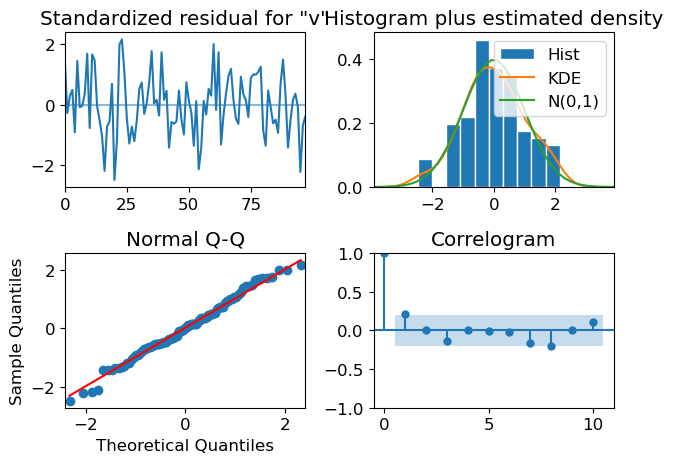

In [21]:
# Gr√°fico de los diagn√≥sticos para los residuos
model2.plot_diagnostics()
plt.tight_layout();

## Interpretaci√≥n de resultados

### 1. Significancia de los par√°metros
Queremos asegurarnos de que cada t√©rmino de nuestro modelo sea estad√≠sticamente significativo. La hip√≥tesis nula de esta secci√≥n es que cada coeficiente **NO es estad√≠sticamente significativo**. Por lo tanto, queremos que cada t√©rmino tenga un **valor de p menor que 0,05**, por lo que podemos rechazar la hip√≥tesis nula con valores estad√≠sticamente significativos.
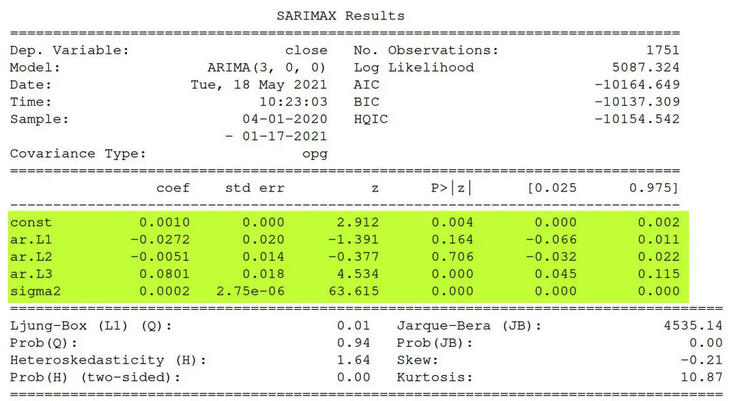

Para la imagen dada L1 y L2 no son estad√≠sticamente significativos ya que sus p-values son mayores que 0.05 y no puedo rechazar la hip√≥tesis nula.

### 2. Revisi√≥n de suposiciones
A continuaci√≥n, queremos asegurarnos de que nuestro modelo cumpla con la **suposici√≥n de que los residuos son independientes**, lo que se conoce como ruido blanco.

Si los residuos no son independientes, podemos extraer la no aleatoriedad para hacer un mejor modelo.
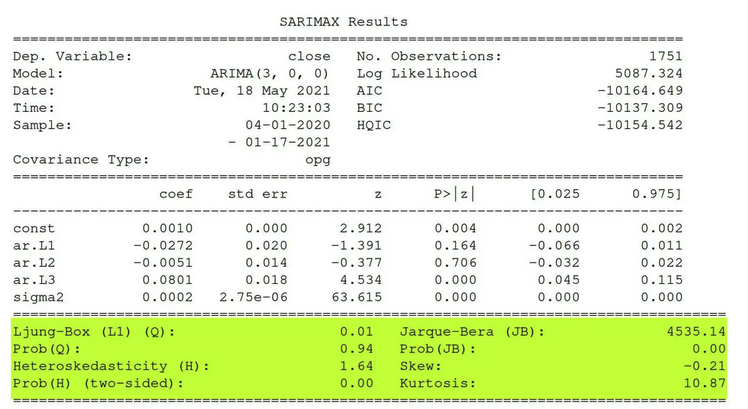

**Ljung-Box**

Es un tipo de prueba estad√≠stica de si un grupo cualquiera de autocorrelaciones de una serie de tiempo son diferentes de cero.

La prueba de Ljung-Box se puede definir de la siguiente manera.

- H0: **Los datos se distribuyen de forma independiente** (es decir, las correlaciones en la poblaci√≥n de la que se toma la muestra son 0, de modo que cualquier correlaci√≥n observada en los datos es el resultado de la aleatoriedad del proceso de muestreo).
- Ha: Los datos no se distribuyen de forma independiente.

El Ljung-Box (L1) (Q) es el estad√≠stico de prueba LBQ en el desfase 1, el Prob(Q) es 0,01 y el valor-p es 0,94. Dado que la probabilidad est√° por encima de 0,05, no podemos rechazar la hip√≥tesis nula entoces los datos se distribuyen de forma independiente.

**heterocedasticidad**

La heterocedasticidad prueba que los residuos de error son homoced√°sticos es decir tienen la misma varianza.
Comprueba si la suma de cuadrados en el primer tercio de la muestra es significativamente diferente de la suma de cuadrados en el √∫ltimo tercio de la muestra.
Esta prueba realiza las siguientes pruebas de hip√≥tesis:
- H0: Los datos son homoced√°sticos.
- Ha: Los datos son heteroced√°sticos.

El resumen realiza la prueba de White. Nuestros estad√≠sticos de resumen muestran una estad√≠stica de prueba de 1,64 y un valor-p de 0,00, lo que significa que rechazamos la hip√≥tesis nula y nuestros residuos muestran varianza cambiante (heteroced√°sticos).

**Jarque-Bera**

La prueba de Jarque-Bera es una prueba de bondad de ajuste para comprobar si una muestra de datos tiene la asimetr√≠a y la curtosis de una distribuci√≥n normal.

Pruebas de Jarque-Bera para la normalidad de los errores. Esta prueba realiza las siguientes pruebas de hip√≥tesis:
- H0: **Los datos se distribuyen normalmente (asimetr√≠a=0 y curtosis=3)**
- Ha: Los datos no distribuyen normales.

En nuestro ejemplo, vemos un estad√≠stico de prueba de 4535.14 con una probabilidad de 0, lo que significa que rechazamos la hip√≥tesis nula y los datos no se distribuyen normalmente. Adem√°s, como parte de la prueba de Jarque-Bera, vemos que la distribuci√≥n tiene una ligera asimetr√≠a negativa y una gran curtosis.

### 3.  An√°lisis de ajuste

Log-Likelihood, AIC, BIC y HQIC ayudan a comparar un modelo con otro.
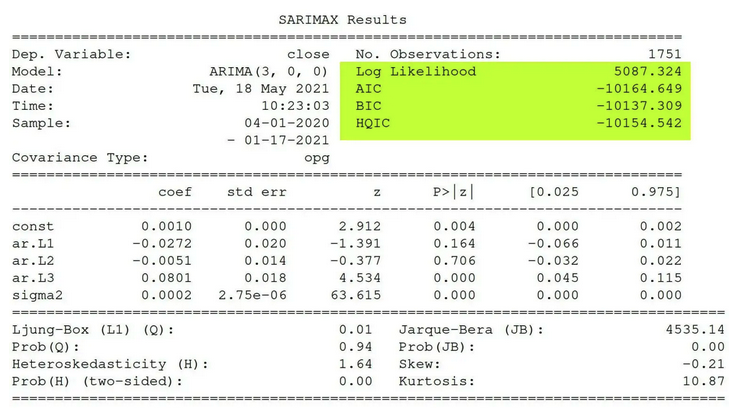

**Log-Likelihood**

La funci√≥n de probabilidad logar√≠tmica identifica una distribuci√≥n que se ajusta mejor a los datos muestreados. Si bien es √∫til, AIC y BIC castigan el modelo por su complejidad, lo que ayuda a que nuestro modelo ARIMA sea parsimonioso. Entre m√°s grande sea este valor mejor.

**Criterio de informaci√≥n de Akaike**

El criterio de informaci√≥n de Akaike (AIC) ayuda a determinar la fuerza del modelo de regresi√≥n lineal. El AIC penaliza a un modelo por agregar par√°metros ya que agregar m√°s par√°metros siempre aumentar√° el valor de m√°xima verosimilitud. Entre m√°s peque√±o sea este valor mejor.

**Criterio de informaci√≥n bayesiano**

El Criterio de Informaci√≥n Bayesiano (BIC), al igual que el AIC, tambi√©n castiga a un modelo por su complejidad, pero tambi√©n incorpora el n√∫mero de filas en los datos. Entre m√°s peque√±o sea este valor mejor.

> Referencia: https://analyzingalpha.com/interpret-arima-results

# <span style="color:red"> Tarea 2. </span>

Para ejemplo estudiado en esta clase data WWWUsage.csv probar lo siguiente:
1. Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilud, justificando la estructura propuesta.
2. Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo precedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los an√°lisis realizados, incluyendo los resultados de las gr√°ficas de ACF y PAC.
3. Investigar la implementaci√≥n y teor√≠a de los modelos SARIMAX. Adem√°s de eso, generar un modelo de pron√≥stico usando SARIMAX, donde todo el procediemiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad:
```
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
data2.index = pd.date_range(start=datetime(data2.time[0], 1, 1), periods=len(data2), freq='MS')
```
**Nota**: Pueden basarse en el siguiente enlace para entender el an√°lisis a realizar 
https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

4. Realizar una predicci√≥n de 20 unidades de tiempo en el futuro, tanto para el modelo ARIMA como SARIMA y reportar los resulados en una gr√°fica donde se puedan observar los datos reales y los datos predichos, c√≥mo en la siguiente gr√°fica:
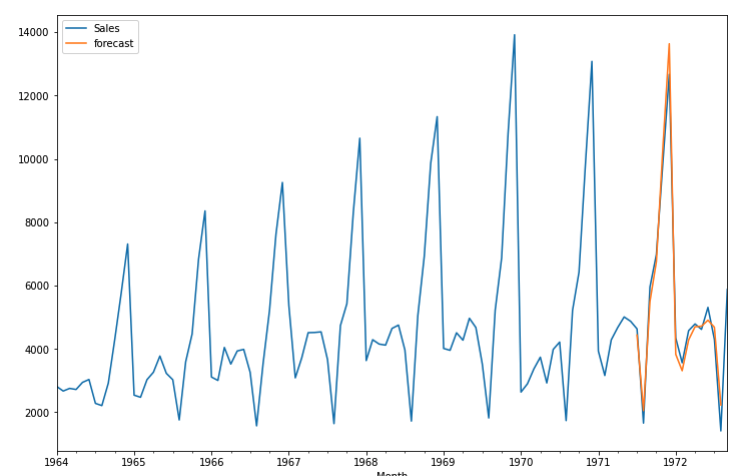

# Notas adicionales

- Conjunto de entrenamiento: Conjunto de ejemplos utilizados para el aprendizaje, es decir, para ajustarse a los par√°metros del clasificador.

- Conjunto de validaci√≥n: un conjunto de ejemplos utilizados para ajustar los par√°metros de un clasificador, por ejemplo, para elegir el n√∫mero de unidades ocultas en una red neuronal.

- Conjunto de prueba: un conjunto de ejemplos utilizados solo para evaluar el rendimiento de un clasificador completamente especificado.

> [Link](https://machinelearningmastery.com/difference-test-validation-datasets/)

## Ejemplos de modelos AR, MA y ARIMA usando el gr√°fico ACF y PACF
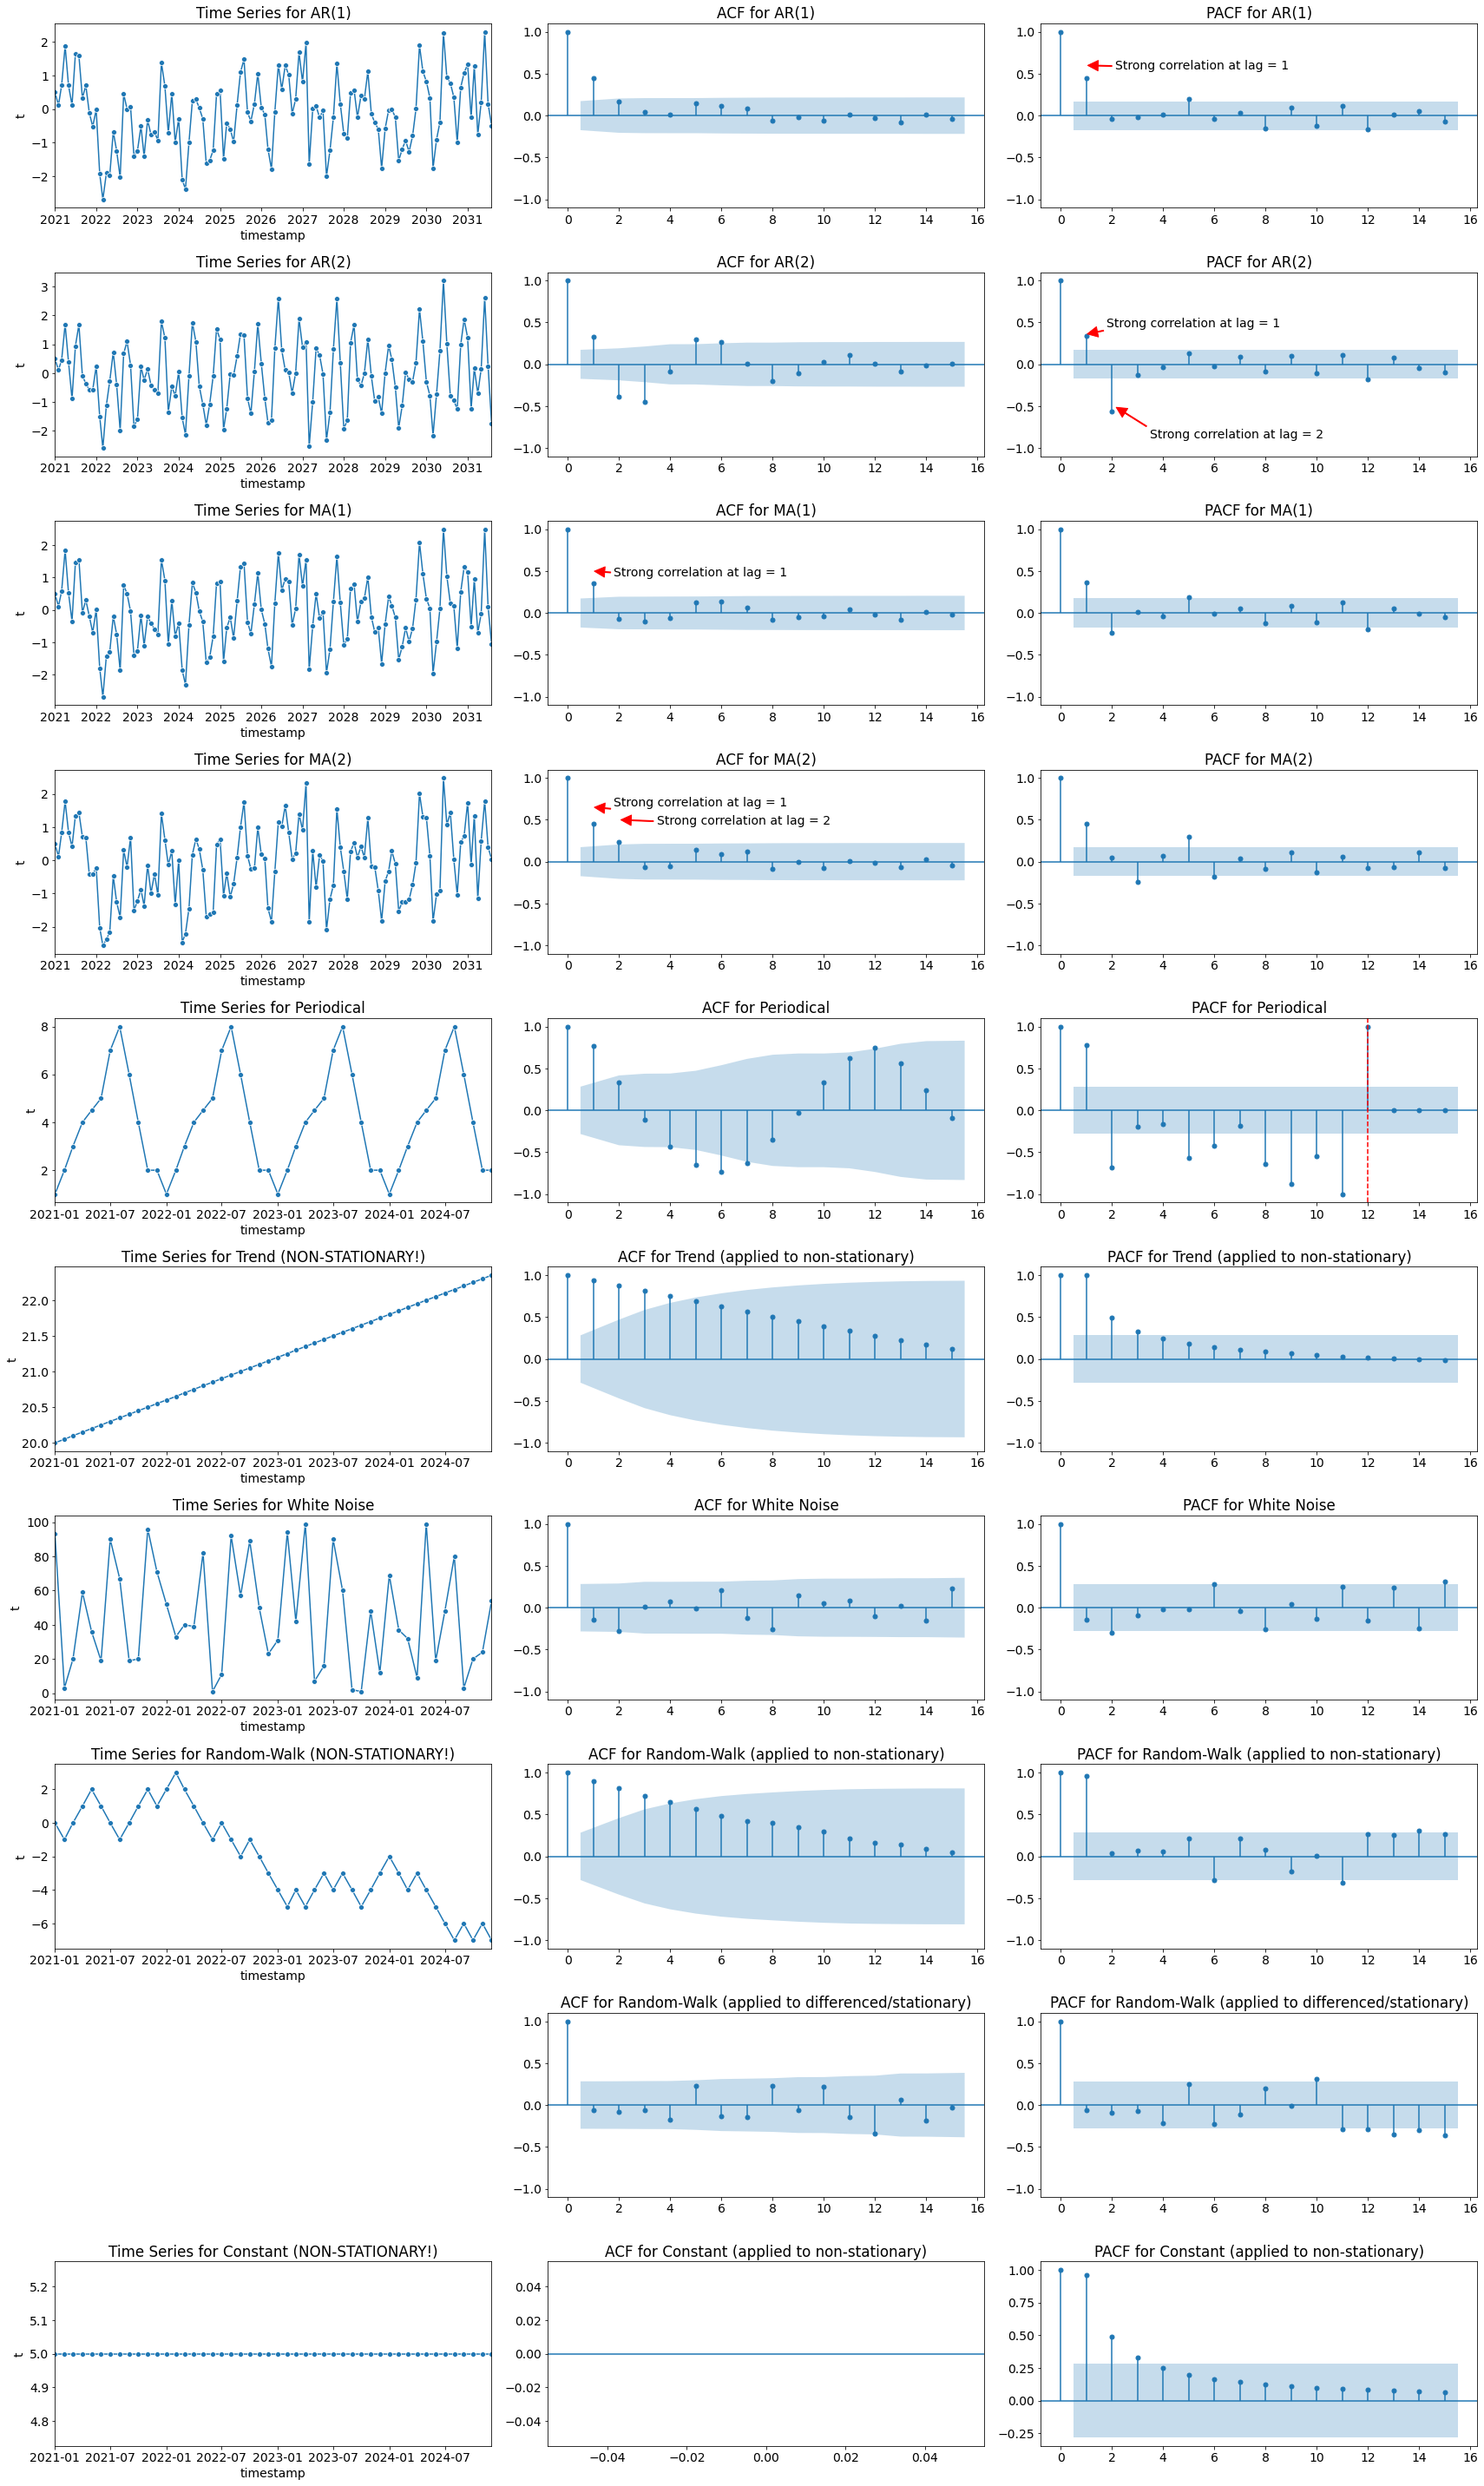